<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Predicción del aterrizaje de la primera etapa del Falcon 9 de SpaceX**


 ## Hands-on Lab: Complete the EDA with Visualization


En esta tarea, predeciremos si la primera etapa del Falcon 9 aterrizará con éxito. SpaceX anuncia lanzamientos de cohetes Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno; gran parte de los ahorros se deben al hecho de que SpaceX puede reutilizar la primera etapa.

En este laboratorio, realizarás análisis exploratorio de datos e ingeniería de características.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


## Objetivos
Realizar análisis exploratorio de datos e ingeniería de características utilizando `Pandas` y `Matplotlib`

- Análisis exploratorio de datos
- Preparación de la ingeniería de características de datos


----


Instalar las siguientes bibliotecas


In [19]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [20]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Análisis exploratorio de datos

Primero, leamos el conjunto de datos de SpaceX en un marco de datos de Pandas e imprimamos su resumen


In [21]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


Primero, intentemos ver cómo las variables `FlightNumber` (que indica los intentos de lanzamiento continuos) y `Payload` afectarían el resultado del lanzamiento.

Podemos representar gráficamente el <code>FlightNumber</code> frente a la <code>PayloadMass</code> y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelo, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también es importante; parece que cuanto más masiva sea la carga útil, menos probable es que la primera etapa regrese.

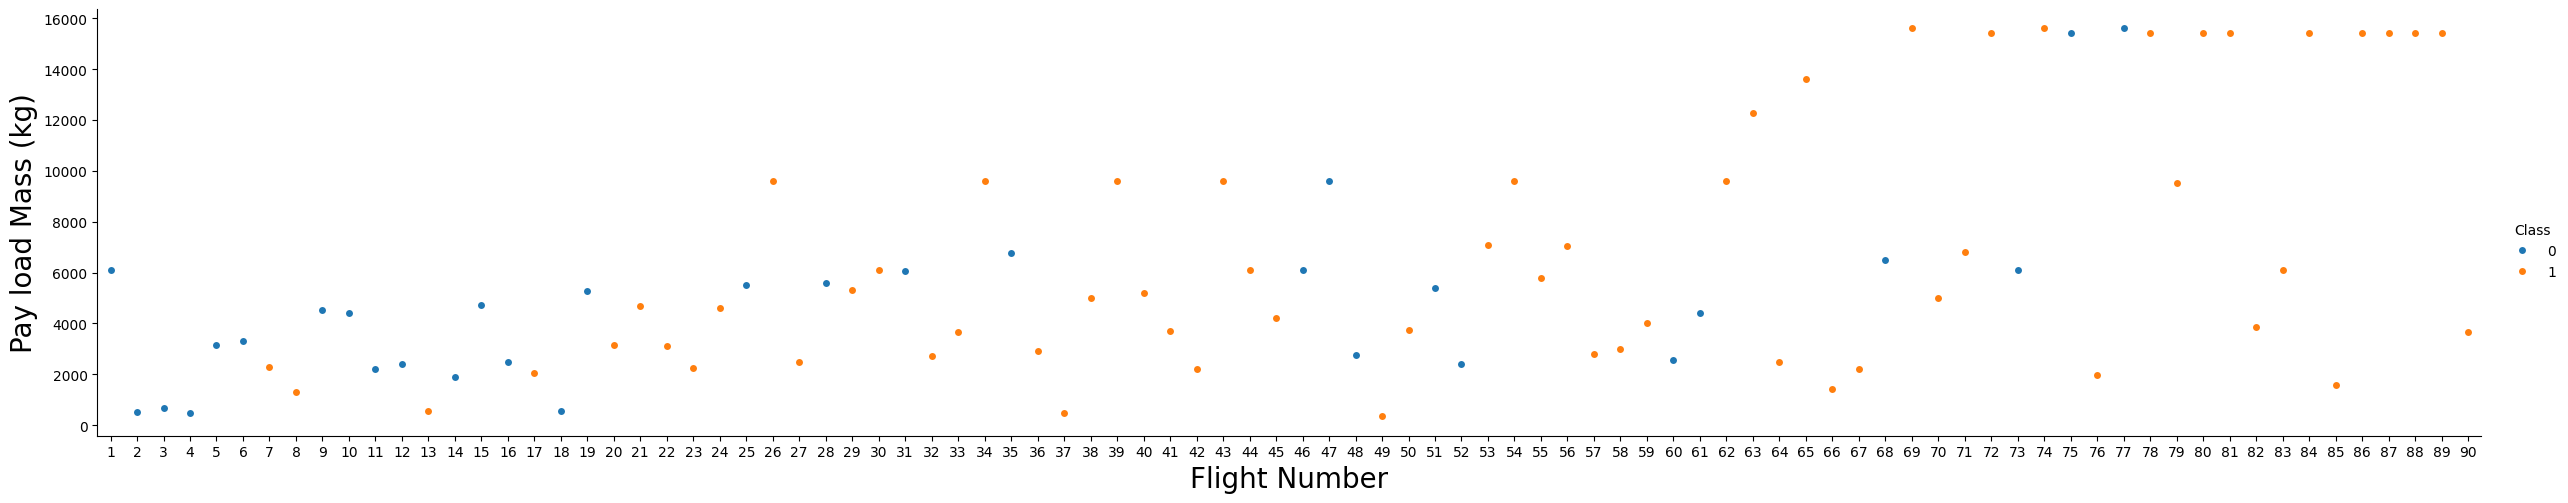

In [22]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, analicemos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.


### TAREA 1: Visualizar la relación entre el número de vuelo y el lugar de lanzamiento


Utilice la función <code>catplot</code> para trazar <code>FlightNumber</code> vs <code>LaunchSite</code>, establezca el parámetro <code>x</code> en <code>FlightNumber</code>, establezca <code>y</code> en <code>Launch Site</code> y establezca el parámetro <code>hue</code> en <code>'class'</code>

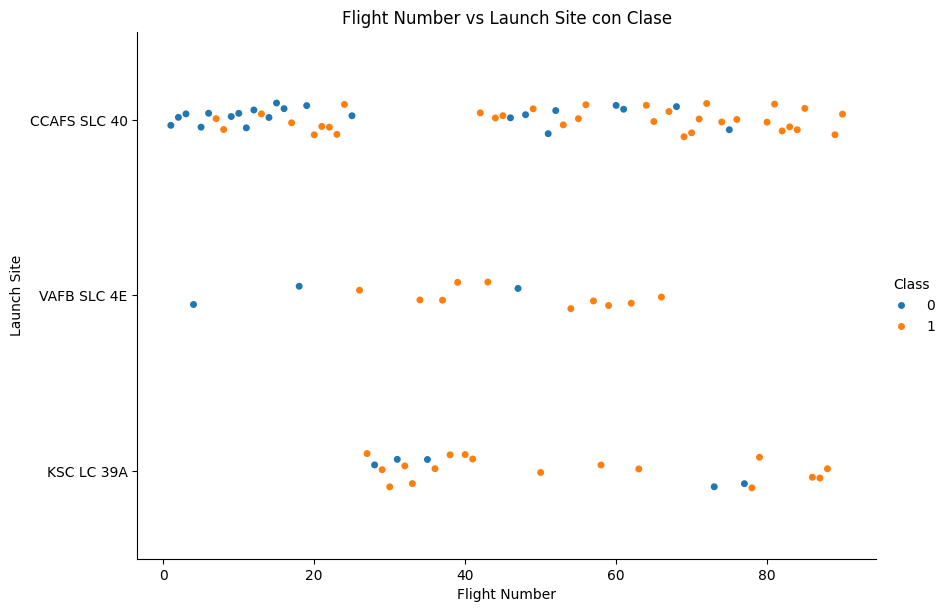

In [43]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(
    data=df,
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class", 
    kind="strip",  # Puedes cambiar a 'swarm' o 'point' según el tipo de visualización deseado
    height=6, 
    aspect=1.5
)

# Configuración de etiquetas y título
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.title("Flight Number vs Launch Site con Clase")
plt.show()

Ahora intenta explicar los patrones que encontraste en los gráficos de puntos de dispersión del número de vuelo frente al sitio de lanzamiento.


### TAREA 2: Visualizar la relación entre la carga útil y el sitio de lanzamiento

También queremos observar si existe alguna relación entre los sitios de lanzamiento y la masa de su carga útil.


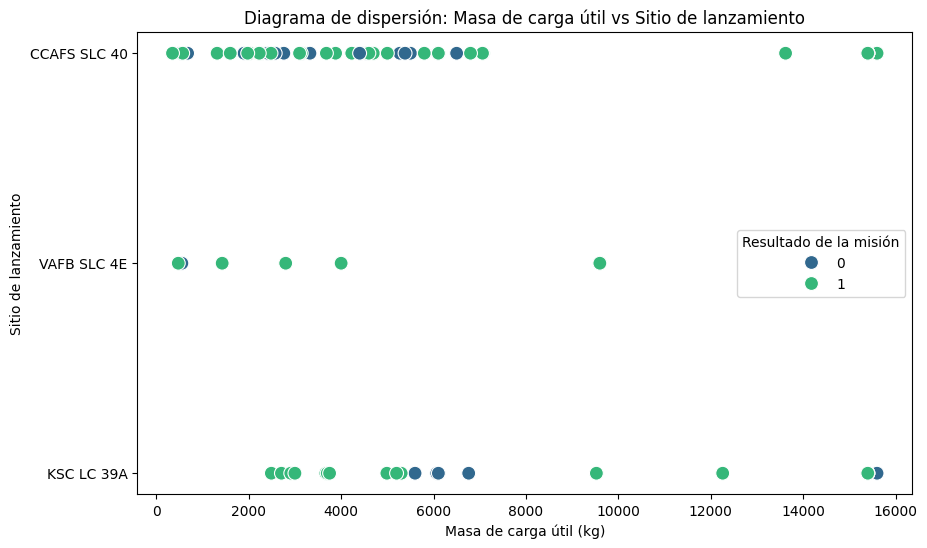

In [24]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PayloadMass",       # Eje x: masa de carga útil en kg
    y="LaunchSite",              # Eje y: sitio de lanzamiento
    hue="Class",                  # Tono basado en el resultado de la misión
    palette="viridis",            # Paleta de colores
    edgecolor="w",                # Color de borde para visibilidad
    s=100                         # Tamaño de los puntos
)

# Configuración de etiquetas y título
plt.xlabel("Masa de carga útil (kg)")
plt.ylabel("Sitio de lanzamiento")
plt.title("Diagrama de dispersión: Masa de carga útil vs Sitio de lanzamiento")
plt.legend(title="Resultado de la misión")
plt.show()


Ahora, si observa el gráfico de puntos de dispersión de carga útil versus lugar de lanzamiento, encontrará que para el sitio de lanzamiento VAFB-SLC no se lanzaron cohetes con una masa de carga útil pesada (superior a 10 000).


### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita

A continuación, queremos comprobar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.

Creemos un "gráfico de barras" para la tasa de éxito de cada órbita.


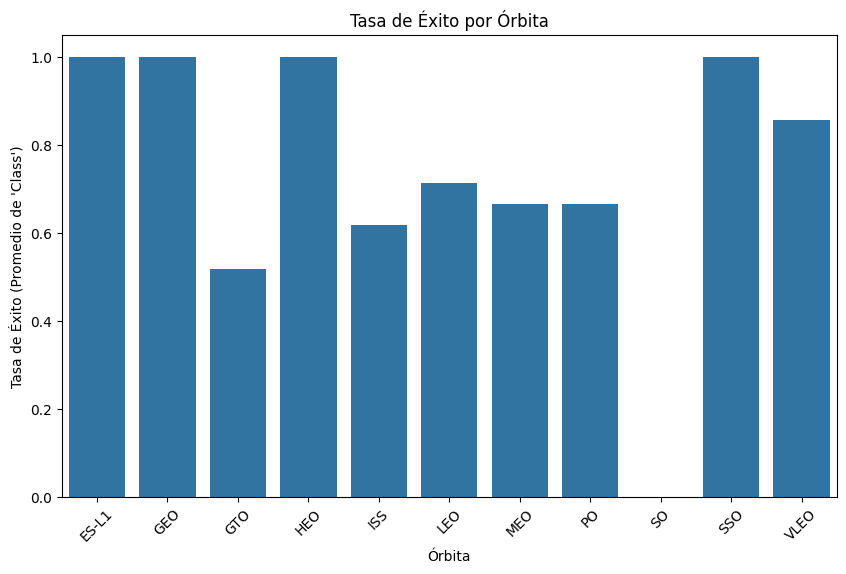

In [25]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Agrupar por 'Orbit' y calcular el promedio de 'class' para obtener la tasa de éxito
mean_class_by_orbit = df.groupby("Orbit")["Class"].mean()

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(x=mean_class_by_orbit.index, y=mean_class_by_orbit.values)

# Etiquetas y título
plt.xlabel("Órbita")
plt.ylabel("Tasa de Éxito (Promedio de 'Class')")
plt.title("Tasa de Éxito por Órbita")

# Rotar las etiquetas del eje x para mayor claridad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Analice el gráfico de barras trazado e intente encontrar qué orbital tiene una alta tasa de éxito.


### TAREA 4: Visualizar la relación entre FlightNumber y el tipo de órbita

Para cada órbita, queremos ver si existe alguna relación entre el número de vuelo y el tipo de órbita.

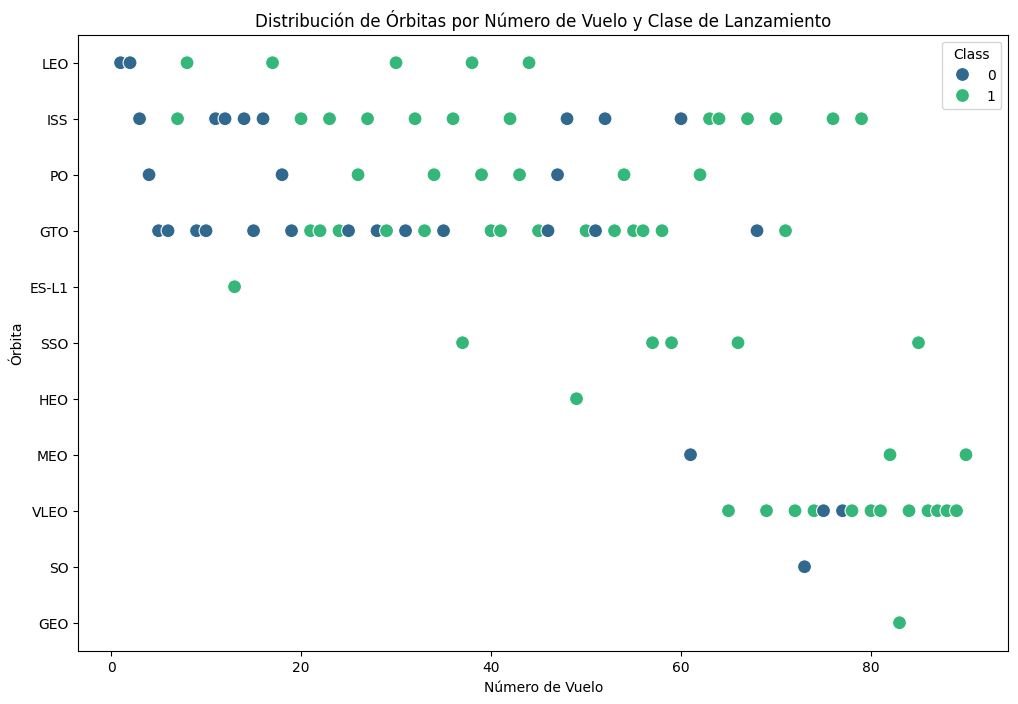

In [26]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class", palette="viridis", s=100)

# Etiquetas y título del gráfico
plt.xlabel("Número de Vuelo")
plt.ylabel("Órbita")
plt.title("Distribución de Órbitas por Número de Vuelo y Clase de Lanzamiento")

# Mostrar el gráfico
plt.show()

Deberías ver que en la órbita LEO el Éxito aparece relacionado con el número de vuelos; por otro lado, no parece haber relación entre el número de vuelos cuando está en órbita GTO.


### TAREA 5: Visualizar la relación entre la carga útil y el tipo de órbita


De manera similar, podemos trazar los gráficos de puntos de dispersión de carga útil vs. órbita para revelar la relación entre la carga útil y el tipo de órbita.


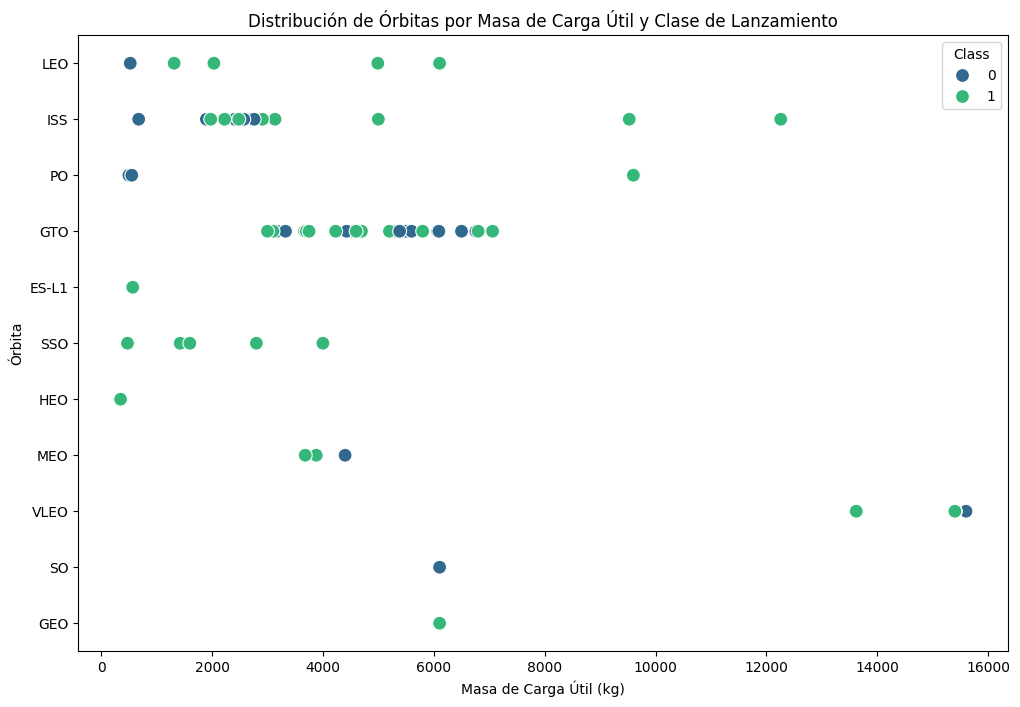

In [27]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="PayloadMass", y="Orbit", hue="Class", palette="viridis", s=100)

# Configuración de etiquetas y título del gráfico
plt.xlabel("Masa de Carga Útil (kg)")
plt.ylabel("Órbita")
plt.title("Distribución de Órbitas por Masa de Carga Útil y Clase de Lanzamiento")

# Mostrar el gráfico
plt.show()

Con cargas útiles pesadas, el aterrizaje exitoso o la tasa de aterrizaje positiva son mayores para la misión Polar, LEO e ISS.

Sin embargo, para GTO no podemos distinguir esto bien, ya que tanto la tasa de aterrizaje positiva como el aterrizaje negativo (misión fallida) están presentes aquí.




### TAREA 6: Visualizar la tendencia anual de éxito del lanzamiento


Puede trazar un gráfico de líneas con el eje x como Año y el eje y como tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.


La función te ayudará a obtener el año a partir de la fecha:


In [31]:
# A function to Extract years from the date 
Year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

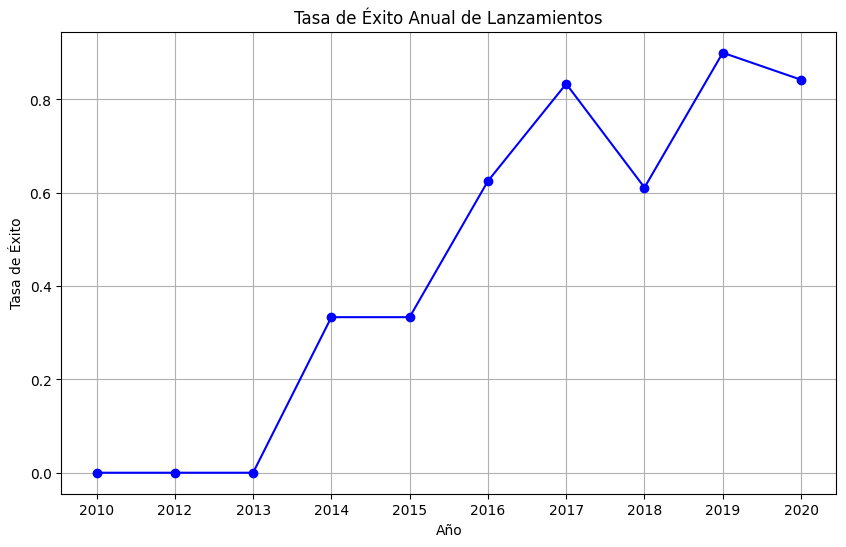

In [35]:
# Dibuje un gráfico de líneas con el eje x como el año extraído y el eje y como la tasa de éxito
# Función para extraer el año de cada fecha en 'Date'
def extract_year(date):
    return date.split("-")[0]

# Crear la columna 'Year' aplicando la función a cada valor de 'Date'
df["Year"] = df["Date"].apply(extract_year)

# Calcular la tasa de éxito anual
success_rate_by_year = df.groupby("Year")["Class"].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(success_rate_by_year.index, success_rate_by_year.values, marker="o", linestyle="-", color="b")

# Configuración de etiquetas y título
plt.xlabel("Año")
plt.ylabel("Tasa de Éxito")
plt.title("Tasa de Éxito Anual de Lanzamientos")
plt.grid(True)

# Mostrar el gráfico
plt.show()


Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2017 (estable en 2014) y después de 2015 comenzó a aumentar.

## Características Ingeniería


A esta altura, ya debería tener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito; seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TAREA 7: Crear variables ficticias para columnas categóricas


Utilice la función <code>get_dummies</code> y el marco de datos <code>features</code> para aplicar OneHotEncoder a las columnas <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Asigne el valor a la variable <code>features_one_hot</code> y muestre los resultados utilizando el método head. El marco de datos de resultados debe incluir todas las funciones, incluidas las codificadas.


In [37]:
# HINT: Use get_dummies() function on the categorical columns
# Aplicar OneHotEncoder a las columnas categóricas usando get_dummies
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Mostrar las primeras filas del marco de datos codificado
features_one_hot.head(2)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TAREA 8: Convertir todas las columnas numéricas a `float64`


Ahora que nuestro marco de datos <code>features_one_hot</code> solo contiene números, convierte todo el marco de datos al tipo de variable <code>float64</code>


In [38]:
# HINT: use astype function
# Convertir todas las columnas de features_one_hot al tipo de dato float64
features_one_hot = features_one_hot.astype('float64')

# Verificar la conversión mostrando las primeras filas y el tipo de datos de cada columna
print(features_one_hot.dtypes)
features_one_hot.head()

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora podemos exportarlo a un <b>CSV</b> para la siguiente sección, pero para que las respuestas sean consistentes, en el próximo laboratorio proporcionaremos datos en un rango de fechas preseleccionado.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [39]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
